## Q1. Airbnbの宿泊料金データの準備
Airbnbは民泊マッチングサービスの最大手であり，様々な民泊施設の空き状況，宿泊料金を確認し，予約を行うことができる．Inside Airbnbでは，Airbnbに掲載された民泊物件のデータが公開されており，宿泊料金を含めた各民泊の各種物件情報を取得することができる．以後の課題では，Inside Airbnbに公開された東京の民泊データを用いて，宿泊料金以外の民泊の物件情報から宿泊料金を予測する回帰モデルを構築する．

以下の手順に従って，分析に用いるデータを準備せよ：

1. Inside Airbnbから最新の東京（Tokyo, Kanto, Japan）のlistings.csv.gzファイル（csvの圧縮ファイル）をダウンロードしpandasのデータフレームに格納せよ．なお，データフレームの変数名はlisting_dfとせよ．
2. listing_dfには，2万を超える民泊物件に関して，物件ID（id）や料金（price）など106個の属性（特徴量）の情報が格納されている．data/airbnbディレクトリのfeatures.tsvファイルには，各属性の意味と今回の課題で用いるか否かのフラグが記されている．features.tsvファイルを用いて，データフレームlisting_dfから課題で用いない属性を削除せよ．

In [1]:
import pandas as pd

In [2]:
listing_path = './data-science-exercise-master/data/airbnb/listings.csv.gz'

listing_df = pd.read_csv(listing_path)
listing_df.head()

/Users/wyuki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35303,https://www.airbnb.com/rooms/35303,20200625032351,2020-06-25,"La Casa Gaienmae C Harajuku, Omotesando is nearby",This shared flat is locating at very close to ...,This apartment is 3 bedroom flat shared with t...,This shared flat is locating at very close to ...,none,10 min walking to Harajuku ~ Urahara ~ Omotesa...,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.17
1,197677,https://www.airbnb.com/rooms/197677,20200625032351,2020-06-25,Oshiage Holiday Apartment,NaN,"We are happy to welcome you to our apartment, ...","We are happy to welcome you to our apartment, ...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,1.55
2,289597,https://www.airbnb.com/rooms/289597,20200625032351,2020-06-25,Private apt in central Tokyo #203,NaN,::::::::::::::::::::::::::::::::::::::::::::::...,::::::::::::::::::::::::::::::::::::::::::::::...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,1.16
3,370759,https://www.airbnb.com/rooms/370759,20200625032351,2020-06-25,"Cozy flat #203, local area YET 10 mins to shib...","So close to busy centers, yet so peaceful! Jus...","Cozy and Relaxing, at home feeling in a reside...","So close to busy centers, yet so peaceful! Jus...",none,Peaceful and residential area just 10 mins awa...,...,t,f,moderate,f,f,3,3,0,0,1.35
4,700253,https://www.airbnb.com/rooms/700253,20200625032351,2020-06-25,Private apt in central Tokyo #201,NaN,::::::::::::::::::::::::::::::::::::::::::::::...,::::::::::::::::::::::::::::::::::::::::::::::...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,1.11


In [3]:
features_path = './data-science-exercise-master/data/airbnb/features.tsv'

features_df = pd.read_table(features_path)
features_df.head()

,feature,description,is_used
0,id,物件ID,NaN
1,listing_url,物件が掲載されたURL,NaN
2,scrape_id,データ抽出ID,NaN
3,last_scraped,最後にウェブサイトからデータを抽出した日時,NaN
4,name,物件名,NaN


In [4]:
drop_list = list(features_df[features_df["is_used"]!=1]["feature"])
listing_df = listing_df.drop(drop_list, axis=1)
listing_df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,NaN,NaN,NaN,f,3.0,t,t,Shibuya Ku,t,Apartment,...,10.0,10.0,9.0,t,f,f,strict_14_with_grace_period,f,f,0.17
1,within a few hours,100%,85%,t,1.0,t,t,Sumida Ku,f,Apartment,...,10.0,9.0,10.0,t,f,f,moderate,f,f,1.55
2,within a few hours,100%,80%,f,2.0,t,t,Nerima Ku,f,Apartment,...,9.0,9.0,9.0,t,f,f,strict_14_with_grace_period,f,f,1.16
3,within a day,100%,92%,t,3.0,t,t,Setagaya Ku,t,Apartment,...,10.0,10.0,10.0,t,t,f,moderate,f,f,1.35
4,within a few hours,100%,80%,f,2.0,t,t,Nerima Ku,f,Apartment,...,10.0,9.0,10.0,t,f,f,strict_14_with_grace_period,f,f,1.11


In [5]:
print(listing_df.dtypes)

host_response_time                   object
host_response_rate                   object
host_acceptance_rate                 object
host_is_superhost                    object
host_listings_count                 float64
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                            object
price                                object
security_deposit                     object
cleaning_fee                         object
minimum_nights                        int64
maximum_nights                        int64
number_of_reviews               

## Q2. データ加工（1/3）：型変換
データフレームlisting_dfに格納されたデータの中には，計算機が処理しにくい形式のデータが混じっている．例えば，属性priceは1泊あたりの料金（日本円）を意味するが，「ドルマーク（＄）」や「カンマ（,）」が文字列として含まれているため数値として扱えない．listing_dfにある下記属性について，指定されたデータ形式に変換し，その結果をlisting_df_v2に格納せよ．

- price：float型
- cleaning_fee：float型
- security_deposit：float型
- host_response_rate：%記号を取り除いた数字（float型）
- host_acceptance_rate：%記号を取り除いた数字（float型）
- host_is_superhost："t"を1，"f"を0とするint型
- host_has_profile_pic："t"を1，"f"を0とするint型
- host_identity_verified："t"を1，"f"を0とするint型
- is_location_exact："t"を1，"f"を0とするint型
- requires_license："t"を1，"f"を0とするint型
- instant_bookable："t"を1，"f"を0とするint型
- is_business_travel_ready："t"を1，"f"を0とするint型
- require_guest_profile_picture："t"を1，"f"を0とするint型
- require_guest_phone_verification："t"を1，"f"を0とするint型

In [6]:
listing_df_v2 = listing_df

In [7]:
money_cols = ['price', 'cleaning_fee', 'security_deposit']
percentage_cols = ['host_response_rate', 'host_acceptance_rate']
tf_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',  'requires_license', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification']

def tf_float_change(x):
    if x == 'f':
        x = 0
    elif x == 't':
        x = 1
    else :
        pass
    return x

for col in money_cols:
    listing_df_v2[col] = listing_df[col].str.replace('$', '').str.replace(',', '').astype({col: float})

for col in percentage_cols:
    listing_df_v2[col] = listing_df[col].str.replace('%', '').astype({col: float})

In [8]:
for col in  tf_cols:
    listing_df_v2[col] = list(map(tf_float_change, listing_df[col]))
    print(listing_df_v2[col])

0        0.0
1        1.0
2        0.0
3        1.0
4        0.0
        ... 
14710    0.0
14711    0.0
14712    0.0
14713    0.0
14714    0.0
Name: host_is_superhost, Length: 14715, dtype: float64
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14710    1.0
14711    1.0
14712    1.0
14713    1.0
14714    1.0
Name: host_has_profile_pic, Length: 14715, dtype: float64
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14710    0.0
14711    0.0
14712    0.0
14713    0.0
14714    0.0
Name: host_identity_verified, Length: 14715, dtype: float64
0        1
1        0
2        0
3        1
4        0
        ..
14710    1
14711    1
14712    1
14713    1
14714    1
Name: is_location_exact, Length: 14715, dtype: int64
0        1
1        1
2        1
3        1
4        1
        ..
14710    1
14711    1
14712    1
14713    1
14714    1
Name: requires_license, Length: 14715, dtype: int64
0        0
1        0
2        0
3        1
4      

## Q3. データの確認（1/2）
listing_df_v2を用いて1泊あたりの宿泊費の基本的な記述統計量（データ数，平均，標準偏差，最小値，最大値，四分位点）を求めよ．また，1泊あたりの宿泊費のヒストグラムを生成し，宿泊費の分布を把握せよ．

In [9]:
listing_df_v2['price'].describe()

count    1.471500e+04
mean     2.653451e+04
std      7.636293e+04
min      0.000000e+00
25%      6.831000e+03
50%      1.179100e+04
75%      1.995900e+04
max      1.066046e+06
Name: price, dtype: float64

In [10]:
import matplotlib.pyplot as plt

(array([6.892e+03, 4.385e+03, 1.162e+03, 4.660e+02, 7.890e+02, 6.300e+01,
        2.100e+01, 5.700e+01, 1.800e+01, 5.880e+02, 2.000e+00, 5.000e+00,
        4.000e+00, 2.000e+00, 4.700e+01, 3.000e+00, 3.000e+00, 0.000e+00,
        3.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 1.200e+01,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 6.400e+01, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

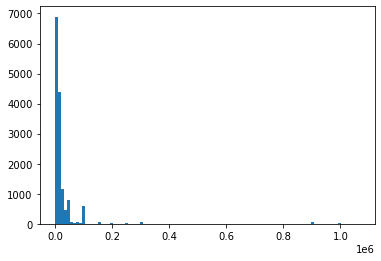

In [11]:
plt.hist(listing_df_v2['price'], bins=100)

## Q4. データの確認（2/2）
listing_df_v2に含まれる欠損値（空の値：NaN）の数を，各属性ごとに求めよ．

In [12]:
listing_df_v2.isnull().sum()

host_response_time                  2401
host_response_rate                  2401
host_acceptance_rate                 504
host_is_superhost                     25
host_listings_count                   25
host_has_profile_pic                  25
host_identity_verified                25
neighbourhood_cleansed                 0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                              4
bedrooms                              23
beds                                  42
bed_type                               0
amenities                              0
price                                  0
security_deposit                    1241
cleaning_fee                         695
minimum_nights                         0
maximum_nights                         0
number_of_reviews                      0
review_scores_rating                2721
review_scores_ac

## Q5. データ加工（2/3）：カテゴリ変数のダミー変数変換
回帰分析等の機械学習を用いる際，天気（例：晴れ，曇り，雨，雪）などのカテゴリ変数（質的データ変数）を特徴量として用いたい場合，カテゴリ変数をダミー変数に変換することで対応する．例えば，下記のようなデータフレームがあるとする．

|ID|日付|天気|売上|
|---:|---:|---:|---:|
|1|xxx|晴れ|3500|
|2|xxx|曇り|1500|
|3|xxx|雨|800|
|4|xxx|晴れ|2200|
  

このデータフレームの天気変数をダミー変数化したデータフレームは下記の通りである．

|ID|日付|天気_晴れ|天気_曇り|天気_雨|売上|
|---:|---:|---:|---:|---:|---:|
|1|xxx|1|0|0|3500|
|2|xxx|0|1|0|1500|
|3|xxx|0|0|1|800|
|4|xxx|1|0|0|2200|

データフレームlisting_df_v2中の下記属性について，ダミー変数化を行い，その結果をlisting_df_v3とせよ．

In [13]:
dummy_targets = ["host_response_time", "neighbourhood_cleansed",
                 "property_type", "room_type", "bed_type", "cancellation_policy"]

In [14]:
listing_df_v3 = listing_df_v2
listing_df_v3 = pd.concat([listing_df_v3.drop(dummy_targets, axis=1), pd.get_dummies(listing_df_v2[dummy_targets])], axis=1)
listing_df_v3

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,...,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,NaN,NaN,0.0,3.0,1.0,1.0,1,1,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0
1,100.0,85.0,1.0,1.0,1.0,1.0,0,2,1.0,1.0,...,0,1,0,0,0,1,0,0,0,0
2,100.0,80.0,0.0,2.0,1.0,1.0,0,2,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0
3,100.0,92.0,1.0,3.0,1.0,1.0,1,2,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0
4,100.0,80.0,0.0,2.0,1.0,1.0,0,2,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14710,NaN,NaN,0.0,0.0,1.0,0.0,1,8,1.0,3.0,...,0,0,0,1,0,0,0,1,0,0
14711,100.0,100.0,0.0,76.0,1.0,0.0,1,2,1.0,1.0,...,0,0,0,1,1,0,0,0,0,0
14712,100.0,100.0,0.0,3.0,1.0,0.0,1,3,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0
14713,100.0,100.0,0.0,3.0,1.0,0.0,1,3,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0


In [15]:
pd.options.display.max_columns = None
listing_df_v3

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Adachi Ku,neighbourhood_cleansed_Akiruno Shi,neighbourhood_cleansed_Akishima Shi,neighbourhood_cleansed_Arakawa Ku,neighbourhood_cleansed_Bunkyo Ku,neighbourhood_cleansed_Chiyoda Ku,neighbourhood_cleansed_Chofu Shi,neighbourhood_cleansed_Chuo Ku,neighbourhood_cleansed_Edogawa Ku,neighbourhood_cleansed_Fuchu Shi,neighbourhood_cleansed_Fussa Shi,neighbourhood_cleansed_Hachijo Machi,neighbourhood_cleansed_Hachioji Shi,neighbourhood_cleansed_Hamura Shi,neighbourhood_cleansed_Higashikurume Shi,neighbourhood_cleansed_Higashimurayama Shi,neighbourhood_cleansed_Higashiyamato Shi,neighbourhood_cleansed_Hino Shi,neighbourhood_cleansed_Hinohara Mura,neighbourhood_cleansed_Inagi Shi,neighbourhood_cleansed_Itabashi Ku,neighbourhood_cleansed_Katsushika Ku,neighbourhood_cleansed_Kita Ku,neighbourhood_cleansed_Kodaira Shi,neighbourhood_cleansed_Koganei Shi,neighbourhood_cleansed_Kokubunji Shi,neighbourhood_cleansed_Komae Shi,neighbourhood_cleansed_Koto Ku,neighbourhood_cleansed_Kunitachi Shi,neighbourhood_cleansed_Machida Shi,neighbourhood_cleansed_Meguro Ku,neighbourhood_cleansed_Minato Ku,neighbourhood_cleansed_Mitaka Shi,neighbourhood_cleansed_Miyake Mura,neighbourhood_cleansed_Musashimurayama Shi,neighbourhood_cleansed_Musashino Shi,neighbourhood_cleansed_Nakano Ku,neighbourhood_cleansed_Nerima Ku,neighbourhood_cleansed_Niijima Mura,neighbourhood_cleansed_Nishitokyo Shi,neighbourhood_cleansed_Ogasawara Mura,neighbourhood_cleansed_Okutama Machi,neighbourhood_cleansed_Ome Shi,neighbourhood_cleansed_Oshima Machi,neighbourhood_cleansed_Ota Ku,neighbourhood_cleansed_Setagaya Ku,neighbourhood_cleansed_Shibuya Ku,neighbourhood_cleansed_Shinagawa Ku,neighbourhood_cleansed_Shinjuku Ku,neighbourhood_cleansed_Suginami Ku,neighbourhood_cleansed_Sumida Ku,neighbourhood_cleansed_Tachikawa Shi,neighbourhood_cleansed_Taito Ku,neighbourhood_cleansed_Tama Shi,neighbourhood_cleansed_Toshima Ku,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Hut,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Resort,property_type_Ryokan (Japan),property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,NaN,NaN,0.0,3.0,1.0,1.0,1,1,1.0,1.0,1.0,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",4163.0,30000.0,5000.0,28,1125,18,94.0,9.0,9.0,9.0,10.0,10.0,9.0,1,0,0,0,0,0.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0

## Q6. データ加工（3/3）：カテゴリ変数のダミー変数変換2
下記のように，データフレームlisting_df_v3のamenities属性には，1つの属性にカンマ区切りで複数の要素が格納されている．

| price | ... | amenities | ... |
|---:|---:|:---|---:|
|10000| ... | toilet, WiFi, BBQ grill| ... |
|15000| ... | toilet, WiFi, Air purifier| ... |

amenities属性に含まれる各要素をダミー変数化し，listing_df_v3を以下のような形式に変換せよ．その結果をデータフレームlisting_df_v4に格納せよ．

| price | ... | toilet | WiFi | BBQ gril | Air purifier | ... |
|---:|---:|:---|:---|:---|:---|---:|
|10000| ... |1|1|1|0| ... |
|15000| ... |1|1|0|1| ... |

In [16]:
import itertools
listing_df_v4 = listing_df_v3

In [17]:
# make new cols
amenities_cols = listing_df_v3["amenities"].values.tolist()
amenities_cols = [col.replace('{', '').replace('}', '').replace('"', '').split(',') for col in amenities_cols]
# print(amenities_cols[:10])
amenities_cols_list = list(set(itertools.chain.from_iterable(amenities_cols)))
print(len(amenities_cols_list))
print(amenities_cols_list[1:20])

159
['Kitchenette', 'Children’s dinnerware', 'Smart TV', 'Terrace', 'Carbon monoxide alarm', 'Babysitter recommendations', 'Hangers', 'Hot water', 'Toilet paper', 'Barbecue utensils', 'Heated floors', 'Outlet covers', 'No stairs or steps to enter', 'Private living room', 'Building staff', 'Air purifier', 'Roll-in shower with chair', ' toilet', 'Long term stays allowed']


In [18]:
def make_dummy_v4(now_col, new_col, listing_df_v4):
    new_data = []
    for row in listing_df_v3[now_col].values:
        if new_col in row:
            new_data.append(1)
        else:
            new_data.append(0)
    listing_df_v4[new_col] = new_data
    return listing_df_v4

In [19]:
for new_col in amenities_cols_list[1:]:
    make_dummy_v4('amenities', new_col, listing_df_v4)
listing_df_v4 = listing_df_v4.drop('amenities', axis=1)
listing_df_v4

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Adachi Ku,neighbourhood_cleansed_Akiruno Shi,neighbourhood_cleansed_Akishima Shi,neighbourhood_cleansed_Arakawa Ku,neighbourhood_cleansed_Bunkyo Ku,neighbourhood_cleansed_Chiyoda Ku,neighbourhood_cleansed_Chofu Shi,neighbourhood_cleansed_Chuo Ku,neighbourhood_cleansed_Edogawa Ku,neighbourhood_cleansed_Fuchu Shi,neighbourhood_cleansed_Fussa Shi,neighbourhood_cleansed_Hachijo Machi,neighbourhood_cleansed_Hachioji Shi,neighbourhood_cleansed_Hamura Shi,neighbourhood_cleansed_Higashikurume Shi,neighbourhood_cleansed_Higashimurayama Shi,neighbourhood_cleansed_Higashiyamato Shi,neighbourhood_cleansed_Hino Shi,neighbourhood_cleansed_Hinohara Mura,neighbourhood_cleansed_Inagi Shi,neighbourhood_cleansed_Itabashi Ku,neighbourhood_cleansed_Katsushika Ku,neighbourhood_cleansed_Kita Ku,neighbourhood_cleansed_Kodaira Shi,neighbourhood_cleansed_Koganei Shi,neighbourhood_cleansed_Kokubunji Shi,neighbourhood_cleansed_Komae Shi,neighbourhood_cleansed_Koto Ku,neighbourhood_cleansed_Kunitachi Shi,neighbourhood_cleansed_Machida Shi,neighbourhood_cleansed_Meguro Ku,neighbourhood_cleansed_Minato Ku,neighbourhood_cleansed_Mitaka Shi,neighbourhood_cleansed_Miyake Mura,neighbourhood_cleansed_Musashimurayama Shi,neighbourhood_cleansed_Musashino Shi,neighbourhood_cleansed_Nakano Ku,neighbourhood_cleansed_Nerima Ku,neighbourhood_cleansed_Niijima Mura,neighbourhood_cleansed_Nishitokyo Shi,neighbourhood_cleansed_Ogasawara Mura,neighbourhood_cleansed_Okutama Machi,neighbourhood_cleansed_Ome Shi,neighbourhood_cleansed_Oshima Machi,neighbourhood_cleansed_Ota Ku,neighbourhood_cleansed_Setagaya Ku,neighbourhood_cleansed_Shibuya Ku,neighbourhood_cleansed_Shinagawa Ku,neighbourhood_cleansed_Shinjuku Ku,neighbourhood_cleansed_Suginami Ku,neighbourhood_cleansed_Sumida Ku,neighbourhood_cleansed_Tachikawa Shi,neighbourhood_cleansed_Taito Ku,neighbourhood_cleansed_Tama Shi,neighbourhood_cleansed_Toshima Ku,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Hut,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Resort,property_type_Ryokan (Japan),property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Kitchenette,Children’s dinnerware,Smart TV,Terrace,Carbon monoxide alarm,Babysitter recommendations,Hangers,Hot water,Toilet paper,Barbecue utensils,Heated floors,Outlet covers,No stairs or steps to enter,Private living room,Building staff,Air purifier,Roll-in shower with chair,toilet,Long term stays allow

In [20]:
'Bedroom comforts' in listing_df_v4.columns.values
'amenities' in listing_df_v4.columns.values

False

## Q7. 欠損値対応（1/2）：行削除
Q4で確認したように，現実世界のデータは欠損値を含むことがしばしばある．欠損値は理由があって値が欠損しているのであれば，欠損していること自体に「意味がある」として，その情報をデータ解析に積極的に活用するべきである．しかし，学習モデルによっては，欠損値を含むデータの学習を行うことができない．そのため，欠損値を何らかの方法で事前に処理する必要がある．

欠損値の対応としては，下記のような方法などが提案されている．

- 欠損値の除去
    - 欠損値を含む行をデータから除外する方法（リストワイズ除去）
    - 欠損値を含む列をデータから除外する方法（ペアワイズ除去）
- 欠損値の補完
    - 欠損値をそれを含む列データの代表値（平均や中央値など）で埋める方法
    - 欠損値をそれを含む行と類似する行データ（k近傍データ）の平均値で埋める方法
    - 多重代入法
    
Q6で準備したデータには欠損値が含まれている．当該データから欠損値を含む行を除外せよ（リストワイズ除去を実行せよ）．

In [21]:
listing_df_v4_cp = listing_df_v4.copy()
listing_df_v4 = listing_df_v4.dropna()
listing_df_v4

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Adachi Ku,neighbourhood_cleansed_Akiruno Shi,neighbourhood_cleansed_Akishima Shi,neighbourhood_cleansed_Arakawa Ku,neighbourhood_cleansed_Bunkyo Ku,neighbourhood_cleansed_Chiyoda Ku,neighbourhood_cleansed_Chofu Shi,neighbourhood_cleansed_Chuo Ku,neighbourhood_cleansed_Edogawa Ku,neighbourhood_cleansed_Fuchu Shi,neighbourhood_cleansed_Fussa Shi,neighbourhood_cleansed_Hachijo Machi,neighbourhood_cleansed_Hachioji Shi,neighbourhood_cleansed_Hamura Shi,neighbourhood_cleansed_Higashikurume Shi,neighbourhood_cleansed_Higashimurayama Shi,neighbourhood_cleansed_Higashiyamato Shi,neighbourhood_cleansed_Hino Shi,neighbourhood_cleansed_Hinohara Mura,neighbourhood_cleansed_Inagi Shi,neighbourhood_cleansed_Itabashi Ku,neighbourhood_cleansed_Katsushika Ku,neighbourhood_cleansed_Kita Ku,neighbourhood_cleansed_Kodaira Shi,neighbourhood_cleansed_Koganei Shi,neighbourhood_cleansed_Kokubunji Shi,neighbourhood_cleansed_Komae Shi,neighbourhood_cleansed_Koto Ku,neighbourhood_cleansed_Kunitachi Shi,neighbourhood_cleansed_Machida Shi,neighbourhood_cleansed_Meguro Ku,neighbourhood_cleansed_Minato Ku,neighbourhood_cleansed_Mitaka Shi,neighbourhood_cleansed_Miyake Mura,neighbourhood_cleansed_Musashimurayama Shi,neighbourhood_cleansed_Musashino Shi,neighbourhood_cleansed_Nakano Ku,neighbourhood_cleansed_Nerima Ku,neighbourhood_cleansed_Niijima Mura,neighbourhood_cleansed_Nishitokyo Shi,neighbourhood_cleansed_Ogasawara Mura,neighbourhood_cleansed_Okutama Machi,neighbourhood_cleansed_Ome Shi,neighbourhood_cleansed_Oshima Machi,neighbourhood_cleansed_Ota Ku,neighbourhood_cleansed_Setagaya Ku,neighbourhood_cleansed_Shibuya Ku,neighbourhood_cleansed_Shinagawa Ku,neighbourhood_cleansed_Shinjuku Ku,neighbourhood_cleansed_Suginami Ku,neighbourhood_cleansed_Sumida Ku,neighbourhood_cleansed_Tachikawa Shi,neighbourhood_cleansed_Taito Ku,neighbourhood_cleansed_Tama Shi,neighbourhood_cleansed_Toshima Ku,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Hut,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Resort,property_type_Ryokan (Japan),property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Kitchenette,Children’s dinnerware,Smart TV,Terrace,Carbon monoxide alarm,Babysitter recommendations,Hangers,Hot water,Toilet paper,Barbecue utensils,Heated floors,Outlet covers,No stairs or steps to enter,Private living room,Building staff,Air purifier,Roll-in shower with chair,toilet,Long term stays allow

## Q8 ホールドアウト法
ホールドアウト法は，データ全体を一定の割合で訓練データと評価データに分け，分割されたデータを用いてモデルの学習と評価を行う方法である．

Q7で準備したデータを7対3の割合で訓練データと評価データに分割し，それらデータを用いて1泊あたりの宿泊費priceを予測する線形回帰（単純な重回帰）モデルを構築せよ．さらに，課題Q8で用意した評価データを用いて，構築したモデルの精度評価を行え．

なお，この課題では，何も考えずにすべての特徴量を学習・評価に利用せよ．また，評価指標は下記のMAE（Mean Absolute Error：平均絶対誤差），RMSE（Root Mean Square Error：二乗平均平方根誤差）を用いよ．



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

In [23]:
# データを学習用と検証用に分割
X_train, X_test, Y_train, Y_test = train_test_split(listing_df_v4.drop('price', axis=1), listing_df_v4['price'], train_size = 0.7, test_size = 0.3, random_state = 0) 
print('X_train : ', len(X_train), ', X_test : ', len(X_test))

X_train :  6667 , X_test :  2858


In [24]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
print('coefficient = ', lr.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr.intercept_) # 切片を出力


coefficient =  318.7972109037283
intercept =  3817.3278290177186


In [25]:
Y_pred = lr.predict(X_test) # 検証データを用いて目的変数を予測
print(Y_pred[:10])
print(Y_test[:10].values)

[ 5185.39831583  4179.81879698 23240.58905053 41386.12198654
 61894.24174695 38578.90895491  8844.58269184 42223.17091926
   217.74960817 28734.89059707]
[ 24975.  11954.  11954.  49949. 149959.  16864.  12488.  49951.  13769.
   8005.]


In [26]:
print('MAE: ', mean_absolute_error(Y_test, Y_pred))

MAE:  29416.563458768098


In [27]:
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, Y_pred)))

RMSE:  61737.486359578725


In [28]:
#誤差でかくない．．．？

## Q9. 交差検証
Q8で行ったホールドアウト法は，分割したデータに偏りがある場合，特定のデータに最適化された学習・評価が行われてしまうという欠点がある．この問題に対応する方法の1つが 交差検証法（Cross Validation） である．交差検証法はデータをK個に分割し，そのうちの1つを評価用データ，残るK−1個を訓練データとした学習・評価をK回行い，得られた評価結果の平均値を最終的な評価指標として用いる方法である．

Q7で構築したデータセットを5分割交差検証法を用いて，1泊あたりの宿泊費priceを予測する線形回帰（単純な重回帰）モデルを構築し，構築した予測モデル（平均の）MAEとRMSEを計算せよ．

In [29]:
def regression_MAE_RMSE (X_train, Y_train, X_test, Y_test):
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    Y_pred = lr.predict(X_test) # 検証データを用いて目的変数を予測
    result = {'MAE' :  mean_absolute_error(Y_test, Y_pred), 'RMSE': np.sqrt(mean_squared_error(Y_test, Y_pred))}
    return result

In [30]:
def flatten_pandas(l):
    result = l[0]
    for i in range(len(l)-1):
        result = result.append(l[i + 1])
    return result

In [31]:
def made_cross_validate(X_data, Y_data, K):
    result = {'MAE': 0, 'RMSE': 0}

    columns = {key: 0 for key in X_data.columns}

    
    #データをK個に分けて，Kの内１つをテスト用，　K-1個を学習用に分割し，regression_MAE_RMSEに投げて結果を　resultに足していく
    for i in range(K):
        X_temp = np.array_split(X_data, K, 0)
        Y_temp = np.array_split(Y_data, K, 0)
        X_test = X_temp.pop(i)
        Y_test = Y_temp.pop(i)
        X_train = flatten_pandas(X_temp)
        Y_train = flatten_pandas(Y_temp)
        print(len(X_train), len(Y_train), len(X_test), len(Y_test))
        dic_MAE_RMSE = regression_MAE_RMSE(X_train, Y_train, X_test, Y_test)
        print('dic_MAE_RMSE', dic_MAE_RMSE)
        result['MAE'] = result['MAE'] + dic_MAE_RMSE['MAE'] 
        result['RMSE'] = result['RMSE'] + dic_MAE_RMSE['RMSE'] 
#         if dic_MAE_RMSE['MAE'] > 100000:
#         print(X_train.mean(), Y_train.mean(), X_test.mean(), Y_test.mean())
#         print("result['MAE']", result['MAE'])

        
    #平均を取る
#     print("result['MAE']", result['MAE'])
    result['MAE'] = result['MAE'] / K
    result['RMSE'] = result['RMSE']  / K
    
    return result

In [32]:
cols = [key for key in listing_df_v4.drop('price', axis=1).columns]
print(len(cols))
print(cols)

check_data = pd.DataFrame(0, columns=cols)
print(check_data)

290
['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification', 'reviews_per_month', 'host_response_time_a few days or more', 'host_response_time_within a day', 'host_response_time_within a few hours', 'host_response_time_within an hour', 'neighbourhood_cleansed_Adachi Ku', 'neighbourhood_cleansed_Akiruno Shi', 'neighbourhood_cleansed_Akishima Shi', 'neighbourhood_cleansed_Arakawa Ku', 'neighbourhood_cleansed_Bunkyo Ku', 'neighbour

ValueError: DataFrame constructor not properly called!

In [ ]:
#なぜか分割した最後のモデルの精度が大きすぎる. 
made_cross_validate(listing_df_v4.drop('price', axis=1).sample(frac=1),  listing_df_v4['price'].sample(frac=1), 5)

# Q10. 外れ値処理
Q4で確認したように，listings.csv.gzファイルのデータには異常に大きな値や本来あり得ない値（例：宿泊費ゼロ），すなわち外れ値が含まれている．データの分布に基づきデータの解釈や予測モデルの構築を行う統計処理・機械学習では，外れ値の影響を受けやすい．そのため，前処理として外れ値を適切に処理することが重要である．

外れ値の検出方法としては様々なものが提案されているが，その1つとして四分位範囲を用いたものがある．この方法では，第1四分位点（$Q_{1/4}$）から第3四分位点（$Q_{3/4}$）の範囲を四分位範囲（IQR）としたとき，

$$
x < Q_{1/4} - 1.5 * IQR \\\\
x ≥ Q_{3/4}+1.5*IQR
$$

の範囲にある$x$，つまり四分位範囲の1.5倍の範囲外にある$x$を外れ値として見なす．1泊あたりの宿泊料金priceが，先の条件を満たすもしくは値がゼロであるもの外れ値と見なし，それらを含む行を除いたデータをデータフレームlisting_df_v6に格納せよ．また，listing_df_v6を用いて，Q9と同様のことを行え．

In [ ]:
def del_out_lier(data):
    q_1 = data['price'].quantile(0.25)
    q_3 = data['price'].quantile(0.75)
    iqr = q_3 - q_1
    del_row = []
    del_row.extend(data[data['price'] <= (q_1 - 1.5 * iqr)].index.values)
    del_row.extend(data[data['price'] >= (q_3 + 1.5 * iqr)].index.values)
    return data.drop(index=del_row)
listing_df_v6 = del_out_lier(listing_df_v4)
listing_df_v6

In [ ]:
made_cross_validate(listing_df_v6.drop('price', axis=1).sample(frac=1),  listing_df_v6['price'].sample(frac=1), 5)

## Q11. 分散による特徴量選択
与えられたデータの特徴量（属性）には，予測モデルの構築に寄与しないものが多く含まれている．特徴量が大量にある場合，予測性能の低下を招くだけでなく，

- 学習にかかる計算コストが大きくなる，
- 学習そのものがうまく進まなくなる（例：次元の呪い）
- モデルの解釈が難しくなる

といった問題も生じる．このような問題に対応するため，有効な特徴量のみを残したまま，特徴量を減らす特徴選択が行われることがある．

特徴選択には

- Filter法：目的変数と説明変数（特徴量）の関係性だけを評価して，関連性の低い説明変数を取り除く（例：相関係数，ANOVA，相互情報量，カイ二乗係数）
- Wrapper法：特徴量の部分集合を用いてモデルの訓練を繰り返し行いながら，性能向上に寄与する特徴量を選択する
- Embedded法：モデルの学習と同時に予測に用いる特徴量を自動的に選択する（例：Lasso回帰）

の3つの方法に大別される．しかし，これらの特徴選択法を適用する前提として，分散がゼロあるいはサンプル大半で値が同じになる特徴量は，汎化性能を低下させる可能性があり，予測に寄与しないとして除外することがある．例えば今回の課題であれば，toiletという属性の値の99%が1（トイレあり）で残り1%がゼロ（トイレなし）であったケースなどである．

データフレームlisting_df_v6から，分散がゼロの特徴量，あるいは値の99%が同じ値である特徴量を除外し，その結果をデータフレームlisting_df_v7に格納せよ

In [ ]:
#分散０を削除 値の９９％が同じ値を削除
import collections

def del_V0_same99(data):
    new_data = data
    for col in data.columns:
        if(np.var(data[col]) == 0):
            new_data = new_data.drop(col, axis=1)
        else:
            commom_data_volume = collections.Counter(new_data[col]).most_common()[0][1]
            if (commom_data_volume / len(new_data[col]) >= 0.99):
                new_data = new_data.drop(col, axis=1)
    return new_data

listing_df_v7 = del_V0_same99(listing_df_v6)
listing_df_v7

## Q12. 目的変数と説明変数の相関分析
特徴量選択の方法の1つであるフィルター法として，目的変数と説明変数（特徴量）との相関係数が大きいものを優先的に採用する方法がある．相関係数による特徴量選択を行うために，price属性とその他の属性の相関係数を求め，その上位30件を表示せよ．

In [ ]:
corr_dic = {}
cols = list(listing_df_v7.columns)
cols.remove('price')
for col in cols:
    corr_dic[col] = np.corrcoef(listing_df_v7['price'], listing_df_v7[col])[0][1]
corr_dic_sorted = sorted(corr_dic.items(), key=lambda x:x[1], reverse=True)
corr_dic_sorted[:29]

## Q13. 相関係数による特徴量選択
listing_df_v7におけるprice値の予測モデルの構築において，相関係数に基づく特徴量選択を行い，相関係数が大きい上位k件の特徴量を用いて線形回帰モデルを構築することを考える．選択する特徴量の個数をk=1から1ずつ増やしていった際の，学習時間，MAE，RMSEの変化を折れ線グラフで図示せよ．

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
def learntime_MAE_RMSE(X_data, Y_data, cols):
    score_times = []
    test_neg_mean_absolute_errors = []
    test_neg_root_mean_squared_errors = []
    for i in range(len(cols)):
        scores = cross_validate(LinearRegression(), X_data[cols[:i]], Y_data, scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'], cv=5, return_estimator=True)
        score_times.append(scores['score_time'].mean())
        test_neg_mean_absolute_errors.append( scores['test_neg_mean_absolute_error'].mean())
        test_neg_root_mean_squared_errors.append(scores['test_neg_root_mean_squared_error'].mean())
        
    return  {'score_times':score_times, 'test_neg_mean_absolute_errors': test_neg_mean_absolute_errors, 'test_neg_root_mean_squared_errors':test_neg_mean_absolute_errors}

In [ ]:
col_list = list(dict(corr_dic_sorted).keys())
scores = learntime_MAE_RMSE(listing_df_v7.drop('price', axis=1), listing_df_v7['price'], col_list)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(listing_df_v7.columns) -1), scores['score_times'])


In [ ]:
plt.plot(range(len(listing_df_v7.columns) -1), scores['test_neg_mean_absolute_errors'])

In [ ]:
plt.plot(range(len(listing_df_v7.columns) -1), scores['test_neg_root_mean_squared_errors'])

## Q14. 欠損値対応（2/2）：代表値補完
Q7では欠損値を含む行を削除することで，欠損値に対応をした（リストワイズ除去）．この方法は学習・評価に用いるデータ数が少なくなるという欠点がある．また，欠損値を含むデータに対する予測を行うことができない．この問題に対応するために，欠損値をそれを含む列のデータの中央値で埋め，再度線形回帰モデルの学習・評価を行え

In [ ]:
listing_df_v4_cp

In [ ]:
listing_df_v8 = listing_df_v4_cp.fillna(listing_df_v4_cp.median())
listing_df_v8

In [ ]:
listing_df_v8 = del_out_lier(listing_df_v8)

In [ ]:
scores = cross_validate(LinearRegression(), listing_df_v8.drop('price', axis=1), listing_df_v8['price'], scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'], cv=5, return_estimator=True)

print('MAE平均\t: ', scores['test_neg_mean_absolute_error'].mean())
print('RMSE平均\t: ', scores['test_neg_root_mean_squared_error'].mean())

## Q15. 総合課題
学習モデルの選択，特徴量の設計選択，欠損値，外れ値処理などを工夫して，1泊あたりの宿泊費priceをより高い精度で予測する回帰モデルを構築せよ．